<ipython-input-16-f6a77b934c79>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-16-f6a77b934c79>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-16-f6a77b934c79>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-16-f6a77b934c79>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-16-f6a77b934c79>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Best Accuracy Model of KNN :  {'ts': 0.1}
Best Accuracy Score of KNN :  0.4896810506566604
Best Accuracy Model of DT :  {'ts': 0.1}
Best Accuracy Score of DT :  0.551594746716698
Predicted value of KNN :  [6]
Predicted value of DT :  [6]


<ipython-input-16-f6a77b934c79>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)


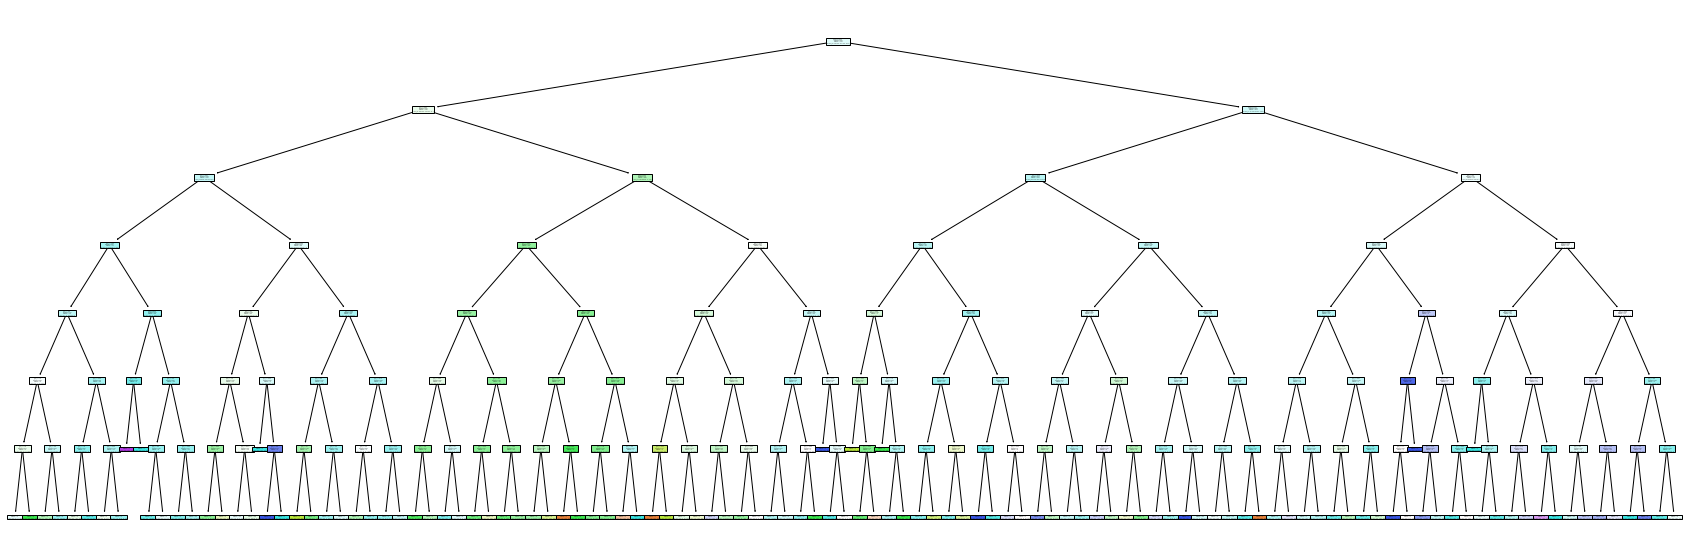

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv('winequalityN.csv')
df=df.drop_duplicates()
df=df.fillna(df.mean())
df1=pd.get_dummies(df)

x = df1.drop('quality',axis=1)
y = df1[['quality']]
acc_KNN = 0
acc_DT=0
acc_model_KNN = {}
acc_model_DT={}
for i in [0.1,0.2,0.3,0.4,0.5]:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=i,random_state=10)
    model1 = KNeighborsClassifier(n_neighbors=71)
    model1.fit(x_train,y_train)
    y_pred1 = model1.predict(x_test)
    acc1 = accuracy_score(y_test,y_pred1)
    
    modal2=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=7)
    modal2.fit(x_train,y_train)
    y_pred2=modal2.predict(x_test)
    acc2=accuracy_score(y_test,y_pred2)
    
    if acc1 > acc_KNN:
        acc_KNN = acc1
        acc_model_KNN = {'ts':i}
    if acc2 > acc_DT:
        acc_DT = acc2
        acc_model_DT = {'ts':i}
        
print("Best Accuracy Model of KNN : ",acc_model_KNN)
print("Best Accuracy Score of KNN : ",acc_KNN)
print("Best Accuracy Model of DT : ",acc_model_DT)
print("Best Accuracy Score of DT : ",acc_DT)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=acc_model_KNN['ts'],random_state=10)
model1 = KNeighborsClassifier(n_neighbors=71)
model1.fit(x_train,y_train)
y_KNN=model1.predict([[6.5,0.34,0.3,0.3,0.03,73,130,0.9,3,0.4,12,1,0]])
print("Predicted value of KNN : ",y_KNN)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=acc_model_DT['ts'],random_state=10)
modal2=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=7) 
modal2.fit(x_train,y_train)
y_DT=modal2.predict([[6.5,0.34,0.3,0.3,0.03,73,130,0.9,3,0.4,12,1,0]])
print("Predicted value of DT : ",y_DT)

plt.figure(figsize=(30,10))
plot_tree(modal2,filled=True)
plt.show()

# OWN MODEL


In [1]:
class lr:
    def __init__ (self):
        self.m=None
        self.b=None
    def fit(self,x_train,y_train):
        num=0
        den=0
        for i in range(x_train.shape[0]):
            num+=((x_train[i]-x_train.mean())*(y_train[i]-y_train.mean()))
            den+=(x_train[i]-x_train.mean())**2
        self.m=num/den
        self.b=y_train.mean()-(self.m*x_train.mean())
        print(self.m)
        print(self.b)
    def predict(self,x_test):
        return self.m*x_test+self.b

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
df = pd.read_csv('Iris.csv')
x=df[['SepalLengthCm']]
y=df['SepalWidthCm']  #target column,dependent variable
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10) 
lr1=lr()
lr1.fit(x_train.values,y_train.values)
lr1.predict(14)

[-0.05949782]
[3.41758552]


array([2.58461608])

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_unclean.csv')
df = df.fillna(df.mean())
df['CLASS'].replace(to_replace='Y',value='Y',inplace=True)
df['CLASS'].replace(to_replace='F',value='F',inplace=True)
df['Gender'].replace(to_replace='f',value='F',inplace=True)
df.drop_duplicates(inplace=True)
df.drop(columns=['ID','No_Pation'],inplace=True)

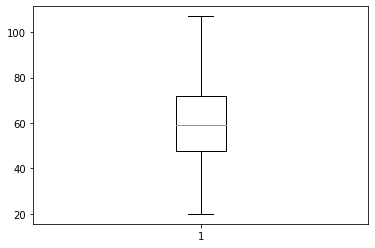

In [37]:
q1 = df['Cr'].quantile(0.25)
q3 = df['Cr'].quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
df = df[(df['Cr']>lower)&(df['Cr']<upper)]
plt.boxplot(df['Cr'])
plt.show()

In [38]:
df['Gender'] = np.where(df['Gender']=='M',0,1)
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50.0,4.700000,46.0,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
1,0,26.0,4.500000,62.0,4.900000,3.7,1.4,1.1,2.1,0.600000,23.0,N
2,1,50.0,4.700000,46.0,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
3,1,50.0,4.700000,46.0,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
4,0,33.0,7.100000,46.0,4.900000,4.9,1.0,0.8,2.0,0.400000,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,0,55.0,5.131094,62.0,6.800000,5.3,2.0,1.0,3.5,0.900000,30.1,Y
1005,0,55.0,4.800000,88.0,8.284155,5.7,4.0,0.9,3.3,1.800000,30.0,Y
1006,0,62.0,6.300000,82.0,6.700000,5.3,2.0,1.0,3.5,1.850595,30.1,Y
1007,1,57.0,4.100000,70.0,9.300000,5.3,3.3,1.0,1.4,1.300000,29.0,Y


<ipython-input-39-b2a1419a9908>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-39-b2a1419a9908>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-39-b2a1419a9908>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-39-b2a1419a9908>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-39-b2a1419a9908>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Best Accuracy Model of KNN :  {'ts': 0.2}
Best Accuracy Score of KNN :  0.8645833333333334
Best Accuracy Model of DT :  {'ts': 0.1}
Best Accuracy Score of DT :  0.9895833333333334
Predicted value of KNN :  ['Y']
Predicted value of DT :  ['Y']


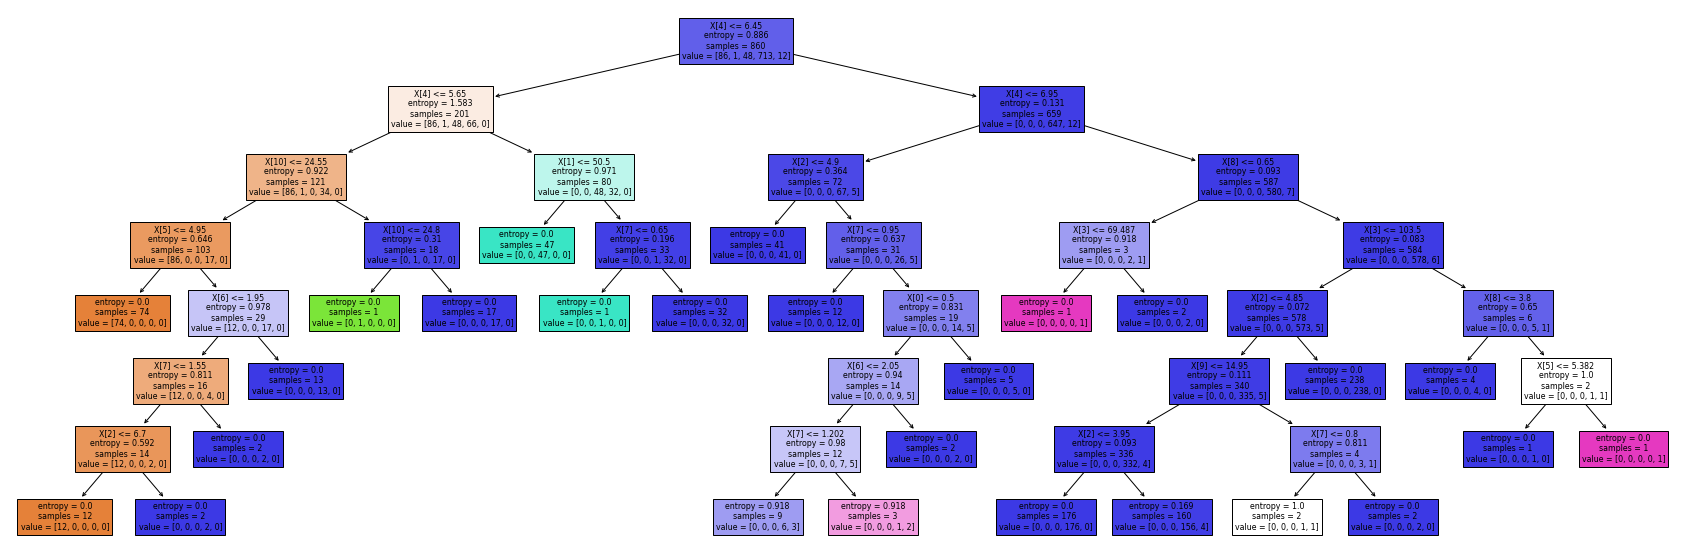

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

x = df.drop('CLASS',axis=1)
y = df[['CLASS']]
acc_KNN = 0
acc_DT=0
acc_model_KNN = {}
acc_model_DT={}
for i in [0.1,0.2,0.3,0.4,0.5]:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=i,random_state=10)
    model1 = KNeighborsClassifier(n_neighbors=10)
    model1.fit(x_train,y_train)
    y_pred1 = model1.predict(x_test)
    acc1 = accuracy_score(y_test,y_pred1)
    
    modal2=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=7) 
    modal2.fit(x_train,y_train)
    y_pred2=modal2.predict(x_test)
    acc2=accuracy_score(y_test,y_pred2)
    
    if acc1 > acc_KNN:
        acc_KNN = acc1
        acc_model_KNN = {'ts':i}
    if acc2 > acc_DT:
        acc_DT = acc2
        acc_model_DT = {'ts':i}
        
print("Best Accuracy Model of KNN : ",acc_model_KNN)
print("Best Accuracy Score of KNN : ",acc_KNN)
print("Best Accuracy Model of DT : ",acc_model_DT)
print("Best Accuracy Score of DT : ",acc_DT)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=acc_model_KNN['ts'],random_state=10)
model1 = KNeighborsClassifier(n_neighbors=71)
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
acc1 = accuracy_score(y_test,y_pred1)
y_KNN=model1.predict([[0,32,4.9,17,4.3,4.3,0.9,2.4,2.3,0.9,26]])
print("Predicted value of KNN : ",y_KNN)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=acc_model_DT['ts'],random_state=10)
modal2=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=7) #max_depth
modal2.fit(x_train,y_train)
y_pred2=modal2.predict(x_test)
acc2=accuracy_score(y_test,y_pred2)
y_DT=modal2.predict([[0,32,4.9,17,4.3,4.3,0.9,2.4,2.3,0.9,26]])
print("Predicted value of DT : ",y_DT)

plt.figure(figsize=(30,10))
plot_tree(modal2,filled=True)
plt.show()